In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sklearn

In [ ]:
import sklearn
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.autograd import Variable
import torch.utils.data as data_utils
import seaborn as sns
import pandas as pd
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from torch import optim
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import keras 
import sklearn
%matplotlib inline

In [ ]:
def remove_space_columns(data):
    temp={}
    for i in data:
        temp[i]=i.replace(' ','_')
    #print(temp)
    return temp

In [ ]:
data= pd.read_csv(filepath,sep=';')

In [ ]:
data.rename(columns=remove_space_columns(data.columns),inplace=True)

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5969,47,1,1,1,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,37,4,1,0,0,1,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5971,47,4,1,0,0,1,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.Pathology.replace([1],0,inplace=True)
data.Pathology.replace([2,3],1,inplace=True)

get dummies for the TCT and create bin for the ages

In [ ]:
data['Agele24']=0
data['Agebw24_34']=0
data['AgeBw34_44']=0
data['AgeBw44and54']=0
data['AgeBw54and64']=0
data['Ageabove64']=0

In [ ]:
data
max_p = data['viral_load'].max()
print(max_p)
data['viral_load'] = data['viral_load'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.1'] = data['viral_load.1'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.2'] = data['viral_load.2'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.3'] = data['viral_load.3'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.4'] = data['viral_load.4'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.5'] = data['viral_load.5'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.6'] = data['viral_load.6'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.7'] = data['viral_load.7'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.8'] = data['viral_load.8'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.9'] = data['viral_load.9'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.10'] = data['viral_load.10'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.11'] = data['viral_load.11'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.12'] = data['viral_load.12'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data

10000000


,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
max_q = data['viral_load'].max()
print(max_q)



7


In [ ]:
data['Agele24']=data.Age<=24
data['Agebw24_34']=(data.Age>24)& (data.Age<=34)
data['AgeBw34_44']=(data.Age>34)& (data.Age<=45)
data['AgeBw44and54']=(data.Age>45)& (data.Age<=55)
data['AgeBw54and64']=(data.Age>55)& (data.Age<=65)
data['Ageabove64']=(data.Age>65)

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,False,False,False
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False


In [ ]:
data['Agele24']=data['Agele24'].replace({True:1,False:0})
data['Agebw24_34']=data['Agebw24_34'].replace({True:1,False:0})

data['AgeBw34_44']=data['AgeBw34_44'].replace({True:1,False:0})
data['AgeBw44and54']=data['AgeBw44and54'].replace({True:1,False:0})
data['AgeBw54and64']=data['AgeBw54and64'].replace({True:1,False:0})
data['Ageabove64']=data['Ageabove64'].replace({True:1,False:0})

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df=data.copy()

Get dummies for the TCT columns

In [ ]:
dum=pd.get_dummies(df.TCT,prefix='TCT')

In [ ]:
dum

,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
5968,0,0,0,0,1
5969,0,1,0,0,0
5970,0,0,0,0,1
5971,0,0,0,0,1


In [ ]:
if 'TCT' in df.columns:
    del df['TCT']
if 'Age' in df.columns:
    del df['Age']
    
# df=pd.concat([df,dum],axis=1)

In [ ]:
col = df.columns
print(col)

Index(['HPV_result', 'v_16', 'viral_load', 'v_18', 'viral_load.1', 'v_31',
       'viral_load.2', 'v_33', 'viral_load.3', 'v_35', 'viral_load.4', 'v_39',
       'viral_load.5', 'v_45', 'viral_load.6', 'v_51', 'viral_load.7', 'v_52',
       'viral_load.8', 'v_56', 'viral_load.9', 'v_58', 'viral_load.10', 'v_59',
       'viral_load.11', 'v_68', 'viral_load.12', 'Pathology', 'Agele24',
       'Agebw24_34', 'AgeBw34_44', 'AgeBw44and54', 'AgeBw54and64',
       'Ageabove64'],
      dtype='object')


In [ ]:
y = df.Pathology
list = ['Agele24','Agebw24_34','AgeBw34_44','AgeBw44and54','AgeBw54and64', 'Ageabove64','Pathology']
v = df[['Agele24','Agebw24_34','AgeBw34_44','AgeBw44and54','AgeBw54and64', 'Ageabove64']].copy()
# list = ['Pathology']
x = df.drop(list, axis = 1)
x.head()
x.shape

(5973, 27)

In [ ]:
x['max_virus']= x.max(axis = 1)
print(x)

x

      HPV_result  v_16  viral_load  ...  v_68  viral_load.12  max_virus
0              0     0           0  ...     0              0          0
1              0     0           0  ...     0              0          0
2              0     0           0  ...     0              0          0
3              0     0           0  ...     0              0          0
4              0     0           0  ...     0              0          0
...          ...   ...         ...  ...   ...            ...        ...
5968           1     0           0  ...     0              0          5
5969           1     1           5  ...     0              0          5
5970           1     0           0  ...     0              0          4
5971           1     0           0  ...     0              0          6
5972           1     0           0  ...     0              0          5

[5973 rows x 28 columns]


,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
x=pd.concat([x,v,dum],axis=1)
x

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,1


Number of patients with CIN:  632
number of patients without CIN:  5341


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


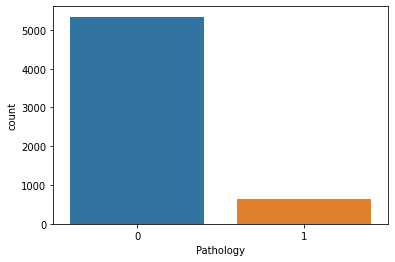

In [ ]:
import seaborn as sns
ax = sns.countplot(y,label="Count") 
N,Y = y.value_counts()

print('Number of patients with CIN: ' , Y)
print('number of patients without CIN: ', N)


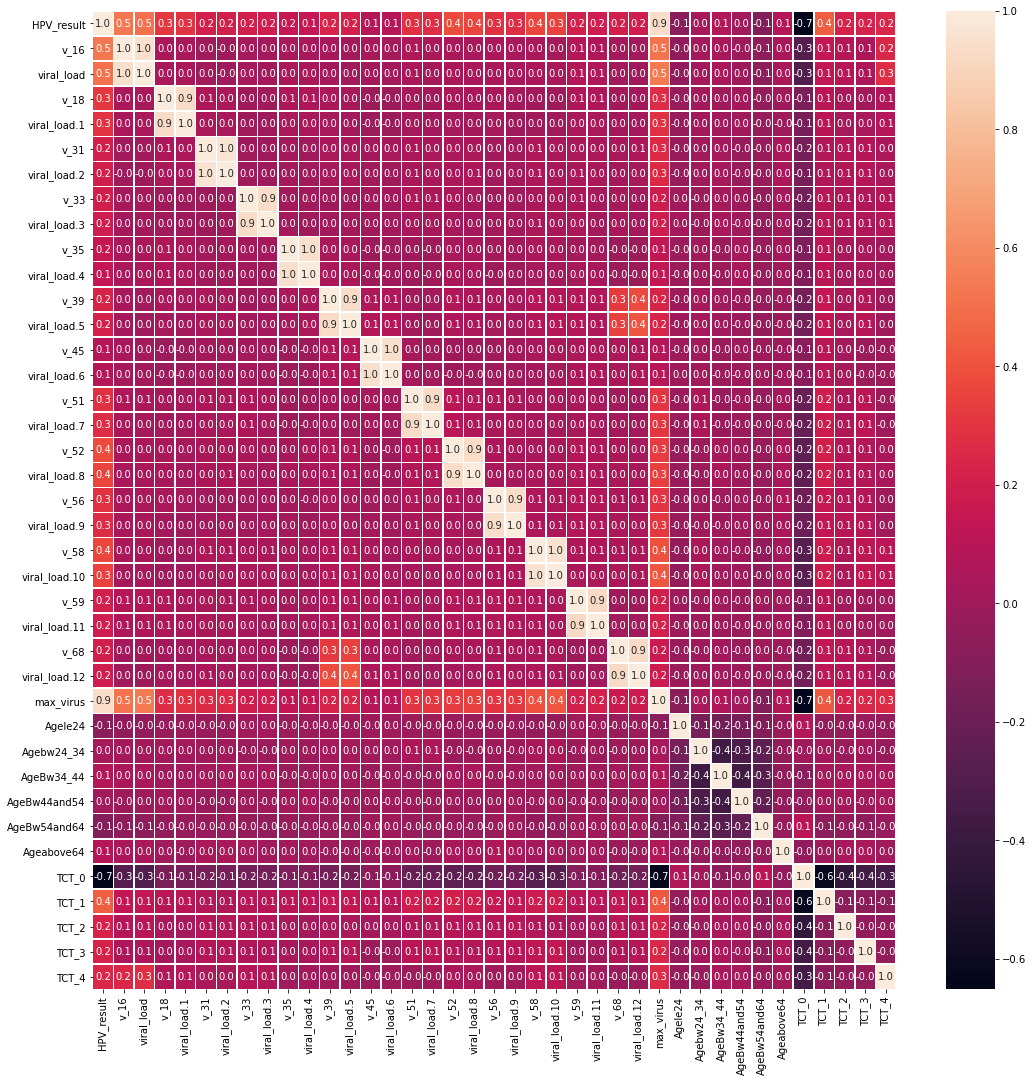

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Correlation map. Looking at the correlation mapping the viral_load and v_16 looks higly correlated. So choosing v_16 and droping viral_load

In [ ]:
x=pd.concat([x,y],axis=1)
x

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4,Pathology
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X=x.copy()
Y=x['Pathology']
del X['Pathology']
X=X
X.shape



(5973, 39)

In [ ]:
X

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,1


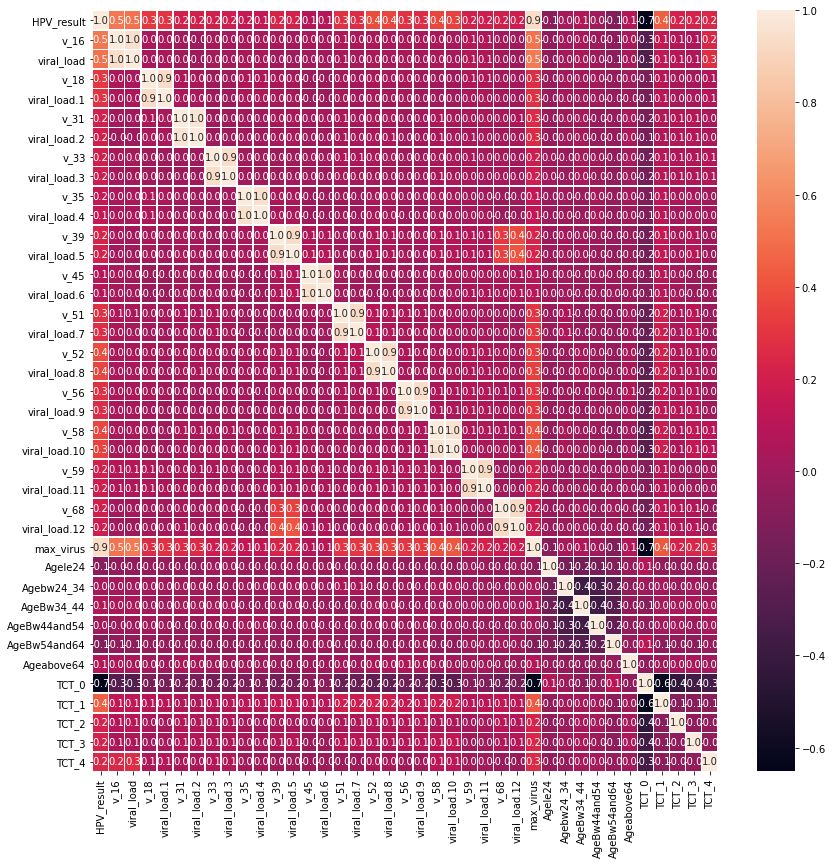

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

MLP on original dataset

In [ ]:

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Define per-fold score containers
num_folds = 10
acc_per_fold = []
loss_per_fold = []
rec_per_fold = []
pre_per_fold = []
f1_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  X_train, X_test = inputs[train], inputs[test]
  y_train, y_test = targets[train], targets[test]
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim=39, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # fit the keras model on the dataset
  model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=10)
  # model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=10)
  # model.fit(x_train, y_train, epochs=150, batch_size=10)
  # evaluate the keras model
  # _, accuracy = model.evaluate(x_test, y_test)
  # _, accuracy = model.evaluate(x_train, y_train)
  # print('Accuracy: %.2f' % (accuracy*100))

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  # f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  print('Recall of ', scores[4])
  print('Precision of ', scores[3])
  print('F1score of ', scores[2])
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  rec_per_fold.append(scores[4])
  pre_per_fold.append(scores[3])
  f1_per_fold.append(scores[2])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print(f'> Fold {i+1} - F1_Score: {f1_per_fold[i]} - Precision: {pre_per_fold[i]} - Recall: {rec_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Recall: {np.mean(rec_per_fold)}')
print(f'> Precision: {np.mean(pre_per_fold)}')
print(f'> F1_score: {np.mean(f1_per_fold)}')
print('------------------------------------------------------------------------')



------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
538/538 [==============================] - 4s 3ms/step - loss: 0.3931 - accuracy: 0.8805 - f1_m: 0.2435 - precision_m: 0.2427 - recall_m: 0.2827 - val_loss: 0.1755 - val_accuracy: 0.9214 - val_f1_m: 0.3728 - val_precision_m: 0.4028 - val_recall_m: 0.3778
Epoch 2/100
538/538 [==============================] - 2s 3ms/step - loss: 0.1724 - accuracy: 0.9219 - f1_m: 0.3477 - precision_m: 0.3954 - recall_m: 0.3408 - val_loss: 0.1667 - val_accuracy: 0.9197 - val_f1_m: 0.3133 - val_precision_m: 0.3528 - val_recall_m: 0.3111
Epoch 3/100
538/538 [==============================] - 2s 3ms/step - loss: 0.1580 - accuracy: 0.9255 - f1_m: 0.3657 - precision_m: 0.4123 - recall_m: 0.3580 - val_loss: 0.1663 - val_accuracy: 0.9348 - val_f1_m: 0.4571 - val_precision_m: 0.4861 - val_recall_m: 0.4681
Epoch 4/100
538/538 [==============================] - 2s 3ms/step - loss: 0.1644 - accuracy: 0.9237 -

Normalization the data between 0 and 1

In [ ]:
def Scalar(X,Y):
    min_max_scaler = preprocessing.MinMaxScaler()
    NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12", "max_virus"]
    # ["viral_load.1", "viral_load.3", "viral_load.5", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.11", "viral_load.12"]
    #["viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12"]
    #['viral_load','viral_load.2', 'viral_load.4', 'viral_load.6', 'viral_load.10']

    for i in NUMERIC_COLUMN:
        X[i]=min_max_scaler.fit_transform(X[i].values.astype('float32').reshape(-1,1))
        
      
    return X, Y
  

Convert the data from numpy array to torch tensor

In [ ]:

def getNewData():
    X1, Y1 = Scalar(X,Y)
    NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12", "max_virus"]

    CATEGORICAL_COLUMN = ["HPV_result", "v_16", "v_18", "v_31", "v_33", "v_35", "v_39", "v_45", "v_51", "v_52", "v_56", "v_58", "v_59", "v_68"] 

    LABEL_COLUMN = "Pathology"
    CATEGORICAL_COLUMN_WITH_IDENTITY = ["TCT_0", "TCT_1", "TCT_2", "TCT_3", "TCT_4", "Agele24", "Agebw24_34", "AgeBw34_44", "AgeBw44and54", "AgeBw54and64", "Ageabove64"]


    for i in CATEGORICAL_COLUMN:
      X1[i]=np.array(X1[i].values.astype('float32'))
      # x_test[i]=np.array(x_test[i].values.astype('float32'))

    for i in X[CATEGORICAL_COLUMN]:
      X1[i]=np.array(X1[i].values.astype('int64'))
      # x_test[i]=np.array(x_test[i].values.astype('int64'))

    for i in X[CATEGORICAL_COLUMN_WITH_IDENTITY]:
      X1[i]=np.array(X1[i].values.astype('int64'))
      # x_test[i]=np.array(x_test[i].values.astype('int64'))

    Y1=pd.DataFrame(data=np.array(Y1.values.astype('int64')),columns=['Pathology'])
    # y_test=pd.DataFrame(data=np.array(y_test.values.astype('int64')),columns=['Pathology'])

    return X1, Y1


In [ ]:
X1, Y1 = getNewData()

Deep Learning with class sampling

In [ ]:

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np
from keras import backend as K
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1

# # Split data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
# Define per-fold score containers
num_folds = 10
acc_per_fold = []
loss_per_fold = []
rec_per_fold = []
pre_per_fold = []
f1_per_fold = []

smoter = SMOTE(random_state=42)

# Merge inputs and targets
X1 = np.concatenate((X_train, X_test), axis=0)
Y1 = np.concatenate((y_train, y_test), axis=0)
# Y1 = np.concatenate((y_train[:,None], y_test), axis=0)

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(inputs, targets):
  X_train, X_test = X1[train_index], X1[test_index]
  y_train, y_test = Y1[train_index], Y1[test_index]
  X_train_upsample, y_train_upsample = SMOTE().fit_sample(X_train, y_train)
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim=39, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # fit the keras model on the dataset
  model.fit(X_train_upsample, y_train_upsample, validation_data=(X_test,y_test), epochs=100, batch_size=10)
  # model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=10)
  # model.fit(x_train, y_train, epochs=150, batch_size=10)
  # evaluate the keras model
  # _, accuracy = model.evaluate(x_test, y_test)
  # _, accuracy = model.evaluate(x_train, y_train)
  # print('Accuracy: %.2f' % (accuracy*100))

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  # f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  print('Recall of ', scores[4])
  print('Precision of ', scores[3])
  print('F1score of ', scores[2])
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  rec_per_fold.append(scores[4])
  pre_per_fold.append(scores[3])
  f1_per_fold.append(scores[2])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print(f'> Fold {i+1} - F1_Score: {f1_per_fold[i]} - Precision: {pre_per_fold[i]} - Recall: {rec_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Recall: {np.mean(rec_per_fold)}')
print(f'> Precision: {np.mean(pre_per_fold)}')
print(f'> F1_score: {np.mean(f1_per_fold)}')
print('------------------------------------------------------------------------')



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
962/962 [==============================] - 4s 3ms/step - loss: 0.4471 - accuracy: 0.8473 - f1_m: 0.8483 - precision_m: 0.8055 - recall_m: 0.9293 - val_loss: 0.2910 - val_accuracy: 0.8478 - val_f1_m: 0.4908 - val_precision_m: 0.4067 - val_recall_m: 0.7083
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2570 - accuracy: 0.8935 - f1_m: 0.8795 - precision_m: 0.8545 - recall_m: 0.9256 - val_loss: 0.3290 - val_accuracy: 0.8361 - val_f1_m: 0.4930 - val_precision_m: 0.4156 - val_recall_m: 0.7167
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2527 - accuracy: 0.9019 - f1_m: 0.8992 - precision_m: 0.8651 - recall_m: 0.9576 - val_loss: 0.2990 - val_accuracy: 0.8512 - val_f1_m: 0.4969 - val_precision_m: 0.4136 - val_recall_m: 0.7083
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2412 - accuracy: 0.9030 -

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 3s 3ms/step - loss: 0.4469 - accuracy: 0.7724 - f1_m: 0.6380 - precision_m: 0.6648 - recall_m: 0.6532 - val_loss: 0.2978 - val_accuracy: 0.8528 - val_f1_m: 0.4627 - val_precision_m: 0.4034 - val_recall_m: 0.6167
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2569 - accuracy: 0.8954 - f1_m: 0.8854 - precision_m: 0.8509 - recall_m: 0.9452 - val_loss: 0.2370 - val_accuracy: 0.8779 - val_f1_m: 0.4514 - val_precision_m: 0.4100 - val_recall_m: 0.5611
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2276 - accuracy: 0.9128 - f1_m: 0.9066 - precision_m: 0.8770 - recall_m: 0.9569 - val_loss: 0.2431 - val_accuracy: 0.8746 - val_f1_m: 0.4764 - val_precision_m: 0.4258 - val_recall_m: 0.6083
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2182 - accuracy: 0.9184 - f1_m: 0.9166 - precision_m: 0.8883 - recall_m: 0.9645 - val_loss: 0.2388 - val_accuracy: 0.8796 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4142 - accuracy: 0.8620 - f1_m: 0.8578 - precision_m: 0.8403 - recall_m: 0.9032 - val_loss: 0.3034 - val_accuracy: 0.8378 - val_f1_m: 0.4727 - val_precision_m: 0.4094 - val_recall_m: 0.6611
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2451 - accuracy: 0.9025 - f1_m: 0.8959 - precision_m: 0.8682 - recall_m: 0.9471 - val_loss: 0.2938 - val_accuracy: 0.8445 - val_f1_m: 0.4698 - val_precision_m: 0.4222 - val_recall_m: 0.6361
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2452 - accuracy: 0.9041 - f1_m: 0.8978 - precision_m: 0.8674 - recall_m: 0.9527 - val_loss: 0.2772 - val_accuracy: 0.8562 - val_f1_m: 0.4826 - val_precision_m: 0.4467 - val_recall_m: 0.6278
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2303 - accuracy: 0.9152 - f1_m: 0.9082 - precision_m: 0.8800 - recall_m: 0.9581 - val_loss: 0.2644 - val_accuracy: 0.8595 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4266 - accuracy: 0.8537 - f1_m: 0.8204 - precision_m: 0.8336 - recall_m: 0.8510 - val_loss: 0.2993 - val_accuracy: 0.8610 - val_f1_m: 0.4683 - val_precision_m: 0.3825 - val_recall_m: 0.6833
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2527 - accuracy: 0.8947 - f1_m: 0.8873 - precision_m: 0.8585 - recall_m: 0.9423 - val_loss: 0.3551 - val_accuracy: 0.8325 - val_f1_m: 0.4377 - val_precision_m: 0.3447 - val_recall_m: 0.6833
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2342 - accuracy: 0.8990 - f1_m: 0.8964 - precision_m: 0.8628 - recall_m: 0.9534 - val_loss: 0.3074 - val_accuracy: 0.8425 - val_f1_m: 0.4399 - val_precision_m: 0.3475 - val_recall_m: 0.6833
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2296 - accuracy: 0.9005 - f1_m: 0.8979 - precision_m: 0.8661 - recall_m: 0.9531 - val_loss: 0.3244 - val_accuracy: 0.8476 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 3s 3ms/step - loss: 0.4265 - accuracy: 0.8458 - f1_m: 0.8337 - precision_m: 0.8329 - recall_m: 0.8663 - val_loss: 0.3067 - val_accuracy: 0.8610 - val_f1_m: 0.4727 - val_precision_m: 0.4111 - val_recall_m: 0.6167
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2468 - accuracy: 0.9019 - f1_m: 0.8985 - precision_m: 0.8743 - recall_m: 0.9425 - val_loss: 0.2848 - val_accuracy: 0.8643 - val_f1_m: 0.4641 - val_precision_m: 0.3992 - val_recall_m: 0.6125
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2308 - accuracy: 0.9067 - f1_m: 0.9036 - precision_m: 0.8735 - recall_m: 0.9543 - val_loss: 0.2934 - val_accuracy: 0.8643 - val_f1_m: 0.4683 - val_precision_m: 0.4050 - val_recall_m: 0.6125
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2285 - accuracy: 0.9084 - f1_m: 0.9036 - precision_m: 0.8701 - recall_m: 0.9590 - val_loss: 0.3002 - val_accuracy: 0.8660 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4732 - accuracy: 0.7620 - f1_m: 0.8077 - precision_m: 0.7258 - recall_m: 0.9695 - val_loss: 0.3235 - val_accuracy: 0.8492 - val_f1_m: 0.4456 - val_precision_m: 0.3700 - val_recall_m: 0.6361
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2505 - accuracy: 0.8985 - f1_m: 0.8961 - precision_m: 0.8658 - recall_m: 0.9488 - val_loss: 0.2953 - val_accuracy: 0.8643 - val_f1_m: 0.4740 - val_precision_m: 0.3994 - val_recall_m: 0.6583
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2270 - accuracy: 0.9122 - f1_m: 0.9016 - precision_m: 0.8737 - recall_m: 0.9518 - val_loss: 0.3043 - val_accuracy: 0.8610 - val_f1_m: 0.4712 - val_precision_m: 0.3967 - val_recall_m: 0.6583
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2128 - accuracy: 0.9171 - f1_m: 0.9124 - precision_m: 0.8843 - recall_m: 0.9588 - val_loss: 0.2885 - val_accuracy: 0.8710 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4260 - accuracy: 0.8423 - f1_m: 0.8465 - precision_m: 0.8014 - recall_m: 0.9314 - val_loss: 0.2492 - val_accuracy: 0.8827 - val_f1_m: 0.4912 - val_precision_m: 0.4403 - val_recall_m: 0.6333
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2489 - accuracy: 0.8968 - f1_m: 0.8892 - precision_m: 0.8535 - recall_m: 0.9516 - val_loss: 0.2460 - val_accuracy: 0.8811 - val_f1_m: 0.4880 - val_precision_m: 0.4311 - val_recall_m: 0.6333
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2230 - accuracy: 0.9070 - f1_m: 0.9014 - precision_m: 0.8625 - recall_m: 0.9637 - val_loss: 0.2581 - val_accuracy: 0.8844 - val_f1_m: 0.4898 - val_precision_m: 0.4336 - val_recall_m: 0.6333
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2128 - accuracy: 0.9144 - f1_m: 0.9110 - precision_m: 0.8760 - recall_m: 0.9688 - val_loss: 0.2319 - val_accuracy: 0.9012 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4714 - accuracy: 0.7828 - f1_m: 0.6776 - precision_m: 0.7716 - recall_m: 0.6677 - val_loss: 0.2626 - val_accuracy: 0.8660 - val_f1_m: 0.4125 - val_precision_m: 0.3492 - val_recall_m: 0.5708
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2548 - accuracy: 0.8978 - f1_m: 0.8895 - precision_m: 0.8580 - recall_m: 0.9449 - val_loss: 0.2439 - val_accuracy: 0.8827 - val_f1_m: 0.4532 - val_precision_m: 0.3958 - val_recall_m: 0.5875
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2338 - accuracy: 0.9051 - f1_m: 0.9003 - precision_m: 0.8711 - recall_m: 0.9535 - val_loss: 0.2460 - val_accuracy: 0.8777 - val_f1_m: 0.4304 - val_precision_m: 0.3792 - val_recall_m: 0.5458
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2419 - accuracy: 0.9005 - f1_m: 0.8953 - precision_m: 0.8653 - recall_m: 0.9481 - val_loss: 0.2478 - val_accuracy: 0.8794 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4098 - accuracy: 0.8316 - f1_m: 0.7909 - precision_m: 0.8133 - recall_m: 0.8182 - val_loss: 0.2837 - val_accuracy: 0.8425 - val_f1_m: 0.4552 - val_precision_m: 0.3383 - val_recall_m: 0.7333
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2592 - accuracy: 0.8890 - f1_m: 0.8846 - precision_m: 0.8479 - recall_m: 0.9478 - val_loss: 0.2880 - val_accuracy: 0.8442 - val_f1_m: 0.4597 - val_precision_m: 0.3464 - val_recall_m: 0.7333
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2427 - accuracy: 0.9007 - f1_m: 0.8981 - precision_m: 0.8634 - recall_m: 0.9577 - val_loss: 0.2743 - val_accuracy: 0.8643 - val_f1_m: 0.4932 - val_precision_m: 0.3936 - val_recall_m: 0.7250
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2230 - accuracy: 0.9124 - f1_m: 0.9052 - precision_m: 0.8787 - recall_m: 0.9510 - val_loss: 0.2570 - val_accuracy: 0.8693 - val_f1_m: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4302 - accuracy: 0.8405 - f1_m: 0.8387 - precision_m: 0.7930 - recall_m: 0.9257 - val_loss: 0.2919 - val_accuracy: 0.8442 - val_f1_m: 0.4599 - val_precision_m: 0.3936 - val_recall_m: 0.6278
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2490 - accuracy: 0.8942 - f1_m: 0.8898 - precision_m: 0.8638 - recall_m: 0.9378 - val_loss: 0.2755 - val_accuracy: 0.8543 - val_f1_m: 0.4767 - val_precision_m: 0.4178 - val_recall_m: 0.6278
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2329 - accuracy: 0.9045 - f1_m: 0.8977 - precision_m: 0.8739 - recall_m: 0.9460 - val_loss: 0.2941 - val_accuracy: 0.8576 - val_f1_m: 0.4829 - val_precision_m: 0.4206 - val_recall_m: 0.6333
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2334 - accuracy: 0.9070 - f1_m: 0.9020 - precision_m: 0.8759 - recall_m: 0.9488 - val_loss: 0.2593 - val_accuracy: 0.8744 - val_f1_m: 